In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import holidays
from datetime import date

In [2]:
goodholidays = []
for date, name in sorted(holidays.US(years=2014).items()):
        print(date, name)
        goodholidays.append(name)

2014-01-01 New Year's Day
2014-01-20 Martin Luther King, Jr. Day
2014-02-17 Washington's Birthday
2014-05-26 Memorial Day
2014-07-04 Independence Day
2014-09-01 Labor Day
2014-10-13 Columbus Day
2014-11-11 Veterans Day
2014-11-27 Thanksgiving
2014-12-25 Christmas Day


In [3]:
#goodholidays.remove("New Year's Day")
#goodholidays.remove("Martin Luther King, Jr. Day")
#goodholidays.remove("Columbus Day")
#goodholidays.remove("Veterans Day")
#goodholidays.remove("Christmas Day")

In [6]:
sales = pd.DataFrame(columns = ['holiday', 'ds', 'lower_window', 'upper_window'])
sales.head()

,holiday,ds,lower_window,upper_window


In [7]:
# 0 = Monday, 1 = Tuesday, 2 = Wednesday . . .

for year in range(2014, 2021):
    for date, name in sorted(holidays.US(years=year).items()):
        lower_window = 0
        upper_window = 0
        if name in goodholidays:
            dayoftheweek = date.weekday()
#            print(dayoftheweek)
#            print (date,name)
            if dayoftheweek == 0:
                lower_window = -2
            if dayoftheweek == 1:
                lower_window = -3
            if dayoftheweek == 3:
                upper_window = 3
            if dayoftheweek == 4:
                upper_window = 2
            sales.loc[len(sales)] = [name, date, lower_window, upper_window]

In [9]:
sales.head()

,holiday,ds,lower_window,upper_window
0,New Year's Day,2014-01-01,0,0
1,"Martin Luther King, Jr. Day",2014-01-20,-2,0
2,Washington's Birthday,2014-02-17,-2,0
3,Memorial Day,2014-05-26,-2,0
4,Independence Day,2014-07-04,0,2


In [10]:
AK_47 = pd.read_csv('AK_47 Google Trends.csv', parse_dates =['period'])

In [11]:
prophetdataframe = pd.DataFrame()
prophetdataframe['ds'] = AK_47['period']
prophetdataframe['y'] = AK_47['value']

prophetdataframe.head()

,ds,y
0,2013-10-07,482.289540
1,2013-10-08,585.815249
2,2013-10-09,470.304167
3,2013-10-10,424.479207
4,2013-10-11,570.211195


In [12]:
m = Prophet(holidays=sales)

In [13]:
m.add_country_holidays(country_name = 'US')

In [14]:
m.fit(prophetdataframe)
print(m.train_holiday_names)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0                  New Year's Day
1     Martin Luther King, Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object


In [16]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

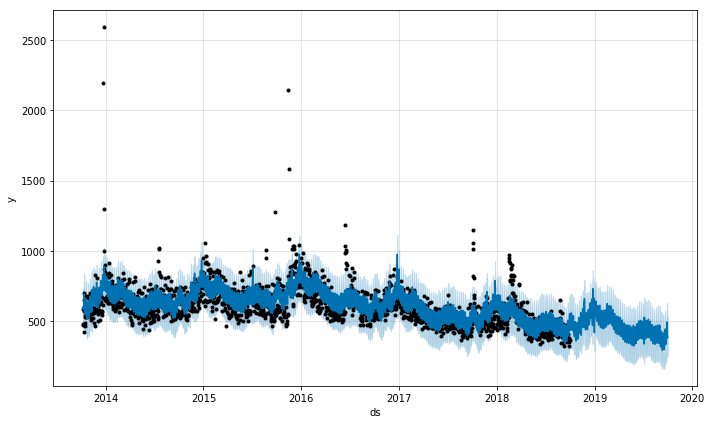

In [18]:
fig1 = m.plot(forecast)

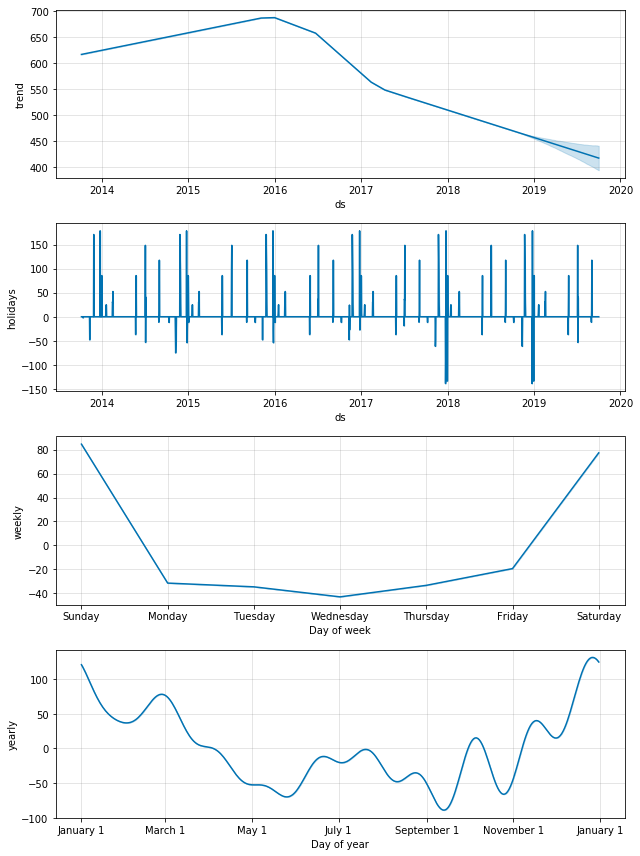

In [19]:
fig = m.plot_components(forecast)

In [30]:
forecast.to_csv('forecast.csv')

In [31]:
erroranalysis = m.predict(prophetdataframe)
erroranalysis['value'] = prophetdataframe['y']
erroranalysis['residuals'] = erroranalysis['value'] - erroranalysis['yhat']
erroranalysis['absoluteresiduals'] = abs(erroranalysis['residuals'])

In [32]:
totalerror = erroranalysis['absoluteresiduals'].sum()

In [36]:
print(totalerror/len(erroranalysis)) # Average residual per day

56.116290641090345


In [37]:
print(erroranalysis.nlargest(10, 'absoluteresiduals'))

             ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
78   2013-12-24  624.132242  590.166774  849.072385   624.132242   624.132242   
77   2013-12-23  624.039653  577.691028  843.470717   624.039653   624.039653   
768  2015-11-14  687.149483  667.165558  932.373922   687.149483   687.149483   
769  2015-11-15  687.167001  667.786367  943.904162   687.167001   687.167001   
1457 2017-10-03  522.703248  379.797207  639.862284   522.703248   522.703248   
981  2016-06-14  659.308740  485.620503  742.438749   659.308740   659.308740   
1456 2017-10-02  522.848149  370.305056  640.209492   522.848149   522.848149   
720  2015-09-27  683.503816  606.712182  877.442449   683.503816   683.503816   
1458 2017-10-04  522.558346  357.539552  625.191464   522.558346   522.558346   
980  2016-06-13  659.481416  472.020915  732.828273   659.481416   659.481416   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
78              0.0                  0.0   

In [40]:
date = pd.to_datetime("2013-12-24")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)

Int64Index([78], dtype='int64')
